In [ ]:
# 3章 ヘルスケア：COVID-19の診断

In [115]:
#
# 適合率 / Precision
# 予測が正解した陽性の数 / 予測した陽性の数
# True Positive / Predicated Positive
#
# 再現率（感度） / Recall
# 予測が正解した陽性の数 / 実際に陽性の数
# True Positive / Actual Positive
#
# 正解率 / Accuracy
# 正解した予測数 / 予測数
#

In [116]:
import numpy as np
np.random.seed(0)
import random
random.seed(0)

In [117]:
import pandas as pd

# ドライブをマウント
covid_flu = pd.read_csv('drive/MyDrive/data/covid_flu.csv')

In [118]:
#
# 3.2 探索的データ分析
#

In [119]:
covid_flu.head()

,Diagnosis,InitialPCRDiagnosis,Age,Sex,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,CReactiveProteinLevels,DurationOfIllness,CTscanResults,RiskFactors,GroundGlassOpacity,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Temperature,Fatigue
0,H1N1,NaN,67.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,No,NaN,38.111111,No
1,H1N1,NaN,29.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,H1N1,NaN,22.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,H1N1,NaN,20.0,F,NaN,NaN,NaN,NaN,NaN,NaN,immuno,NaN,NaN,Yes,Yes,NaN,No,NaN,36.555556,Yes
4,H1N1,NaN,21.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
# 各列の欠損値の割合を表示
covid_flu.isnull().mean()

,0
Diagnosis,0.000000
InitialPCRDiagnosis,0.929825
Age,0.018893
Sex,0.051282
neutrophil,0.930499
serumLevelsOfWhiteBloodCell,0.898111
lymphocytes,0.894737
CReactiveProteinLevels,0.907557
DurationOfIllness,0.941296
CTscanResults,0.892713


In [121]:
# 目的変数の内訳を表示
# null正解率は72%
covid_flu['Diagnosis'].value_counts(normalize=True)

,proportion
Diagnosis,
H1N1,0.723347
COVID19,0.276653


In [122]:
# データ型の確認
covid_flu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482 entries, 0 to 1481
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Diagnosis                    1482 non-null   object 
 1   InitialPCRDiagnosis          104 non-null    object 
 2   Age                          1454 non-null   float64
 3   Sex                          1406 non-null   object 
 4   neutrophil                   103 non-null    float64
 5   serumLevelsOfWhiteBloodCell  151 non-null    float64
 6   lymphocytes                  156 non-null    float64
 7   CReactiveProteinLevels       137 non-null    object 
 8   DurationOfIllness            87 non-null     float64
 9   CTscanResults                159 non-null    object 
 10  RiskFactors                  209 non-null    object 
 11  GroundGlassOpacity           93 non-null     object 
 12  Diarrhea                     450 non-null    object 
 13  Fever             

In [123]:
#
# 3.3 特徴量改善
#

In [124]:
# Pandasの数値型
numeric_types = ['float16', 'float32', 'float64', 'int16', 'int32', 'int64']

numerical_columns = covid_flu.select_dtypes(include=numeric_types).columns.tolist()

numerical_columns

['Age',
 'neutrophil',
 'serumLevelsOfWhiteBloodCell',
 'lymphocytes',
 'DurationOfIllness',
 'Temperature']

In [125]:
from sklearn.impute import SimpleImputer

# 平均値（mean）、中央値（median）のどちらかを選択
num_impute = SimpleImputer(strategy='mean')

print(covid_flu['lymphocytes'].head())

print(f"\n\nMean of Lymphocytes column is {covid_flu['lymphocytes'].mean()}\n\n")

print(num_impute.fit_transform(covid_flu[['lymphocytes']])[:5])

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: lymphocytes, dtype: float64


Mean of Lymphocytes column is 1.8501538461538463


[[1.85015385]
 [1.85015385]
 [1.85015385]
 [1.85015385]
 [1.85015385]]


In [126]:
# Pandasにおけるobject型を意味する
categorical_types = ['O']

categorical_columns = covid_flu.select_dtypes(include=categorical_types).columns.tolist()

categorical_columns.remove('Diagnosis')  # our response variable

for categorical_column in categorical_columns:
    print('=======')
    print(categorical_column)
    print('=======')
    print(covid_flu[categorical_column].value_counts(dropna=False))

InitialPCRDiagnosis
InitialPCRDiagnosis
NaN    1378
Yes     100
No        4
Name: count, dtype: int64
Sex
Sex
M      748
F      658
NaN     76
Name: count, dtype: int64
CReactiveProteinLevels
CReactiveProteinLevels
NaN           1345
8                3
0.5              3
15               3
111              2
              ... 
5.78             1
67.62            1
13.2 mg/dL       1
21.27            1
0.6              1
Name: count, Length: 121, dtype: int64
CTscanResults
CTscanResults
NaN    1323
Yes     144
No       15
Name: count, dtype: int64
RiskFactors
RiskFactors
NaN                                                                   1273
asthma                                                                  36
pneumonia                                                               21
immuno                                                                  21
diabetes                                                                16
                                                

In [127]:
# 「Sex」列を2値化
covid_flu['Female'] = covid_flu['Sex'] == 'F'
del covid_flu['Sex']

# YesをTrue、NoをFalseに置換
covid_flu = covid_flu.replace({'Yes': True, 'No': False})

covid_flu.head(3)

,Diagnosis,InitialPCRDiagnosis,Age,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,CReactiveProteinLevels,DurationOfIllness,CTscanResults,RiskFactors,GroundGlassOpacity,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Temperature,Fatigue,Female
0,H1N1,NaN,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,NaN,False,NaN,38.111111,False,True
1,H1N1,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,H1N1,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [128]:
# カテゴリー値の場合は、引数としてmost_frequentまたはconstantを設定
cat_impute = SimpleImputer(strategy='most_frequent')

print(covid_flu['Coughing'].head())

print(cat_impute.fit_transform(covid_flu[['Coughing']])[:5])

0    True
1     NaN
2     NaN
3    True
4     NaN
Name: Coughing, dtype: object
[[True]
 [True]
 [True]
 [True]
 [True]]


In [129]:
# 標準化前の平均、標準偏差などのスケールはバラバラ
covid_flu[numerical_columns].describe()

,Age,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,DurationOfIllness,Temperature
count,1454.000000,103.000000,151.000000,156.000000,87.000000,628.000000
mean,26.471040,6.854078,6.885159,1.850154,13.988506,38.068312
std,21.487982,12.690131,4.346668,3.956668,9.043171,1.094468
min,0.000000,0.446000,0.500000,0.130000,1.000000,35.722222
25%,7.000000,2.160000,3.995000,0.637500,7.000000,37.222222
50%,24.000000,3.310000,5.690000,0.905500,12.000000,38.000000
75%,42.000000,6.645000,9.155000,1.605000,20.000000,38.722222
max,88.000000,93.000000,36.070000,30.600000,37.000000,42.222222


In [130]:
from sklearn.preprocessing import StandardScaler

# Z-score標準化
pd.DataFrame(
    StandardScaler().fit_transform(covid_flu[numerical_columns]),
    columns=numerical_columns
).describe()

,Age,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,DurationOfIllness,Temperature
count,1.454000e+03,103.000000,1.510000e+02,1.560000e+02,8.700000e+01,6.280000e+02
mean,1.954726e-17,0.000000,-1.411674e-16,-1.708035e-17,-5.614921e-17,1.708471e-15
std,1.000344e+00,1.004890,1.003328e+00,1.003221e+00,1.005797e+00,1.000797e+00
min,-1.232324e+00,-0.507435,-1.473866e+00,-4.361482e-01,-1.444604e+00,-2.145299e+00
25%,-9.064480e-01,-0.371709,-6.671264e-01,-3.074706e-01,-7.772737e-01,-7.736770e-01
50%,-1.150359e-01,-0.280644,-2.758748e-01,-2.395187e-01,-2.211651e-01,-6.246559e-02
75%,7.229298e-01,-0.016556,5.239403e-01,-6.215921e-02,6.686088e-01,5.979450e-01
max,2.864398e+00,6.821614,6.736646e+00,7.289577e+00,2.559378e+00,3.798396e+00


In [131]:
from sklearn.preprocessing import MinMaxScaler

# Min-Max標準化
pd.DataFrame(
    MinMaxScaler().fit_transform(covid_flu[numerical_columns]),
    columns=numerical_columns
).describe()

,Age,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,DurationOfIllness,Temperature
count,1454.000000,103.000000,151.000000,156.000000,87.000000,628.000000
mean,0.300807,0.069236,0.179510,0.056454,0.360792,0.360937
std,0.244182,0.137111,0.122200,0.129855,0.251199,0.168380
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.079545,0.018519,0.098257,0.016656,0.166667,0.230769
50%,0.272727,0.030944,0.145909,0.025451,0.305556,0.350427
75%,0.477273,0.066977,0.243323,0.048408,0.527778,0.461538
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [132]:
#
# 3.4　特徴量作成
#

<Axes: title={'center': 'Lymphocytes'}, xlabel='cells/μL', ylabel='Frequency'>

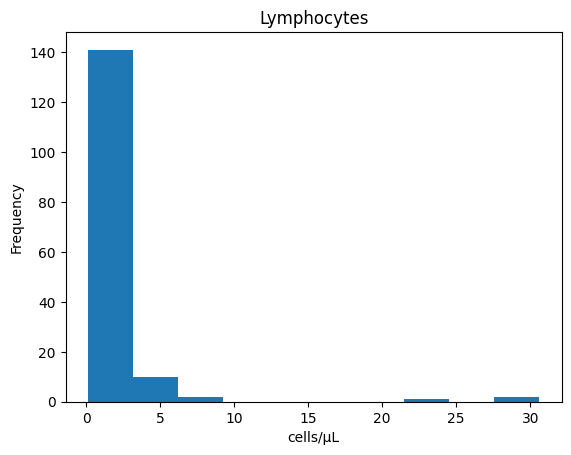

In [133]:
# 対数変換前
covid_flu['lymphocytes'].plot(
    title='Lymphocytes', kind='hist', xlabel='cells/μL'
)

<Axes: title={'center': 'Lymphocytes (Log Transformed)'}, xlabel='cells/μL', ylabel='Frequency'>

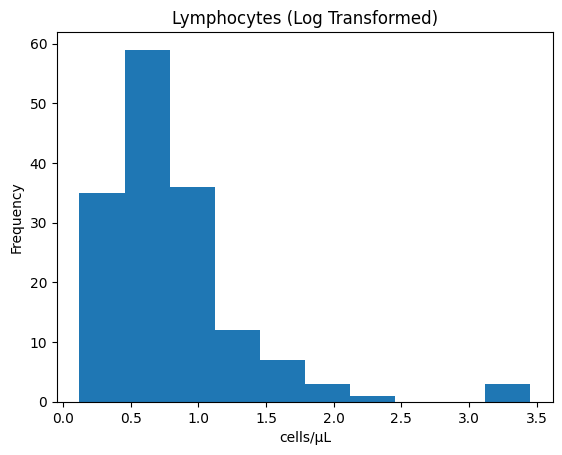

In [134]:
# 対数変換後
covid_flu['lymphocytes'].map(np.log1p).plot(
    title='Lymphocytes (Log Transformed)', kind='hist', xlabel='cells/μL'
)

# 0を扱いたい場合はlog(1+x)を意味するlog1p()を使う
# 対数変換の主な目的は、データを正規分布に近づけること
# 他の目的として、偏ったデータを正規分布のデータに変換し、外れ値を少なくすること

In [135]:
covid_flu[covid_flu['Age']==0].head(3)

,Diagnosis,InitialPCRDiagnosis,Age,neutrophil,serumLevelsOfWhiteBloodCell,lymphocytes,CReactiveProteinLevels,DurationOfIllness,CTscanResults,RiskFactors,GroundGlassOpacity,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Temperature,Fatigue,Female
726,H1N1,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,"asthma, respiratory disease",NaN,True,True,True,NaN,True,False,NaN,NaN,False
727,H1N1,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,True,NaN,False,False,NaN,NaN,True
728,H1N1,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,True,NaN,True,False,NaN,NaN,True


In [136]:
# 「Age」列に0が含まれないようにする
covid_flu['Age'] = covid_flu['Age'] + 0.01

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'neutrophil'}>],
       [<Axes: title={'center': 'serumLevelsOfWhiteBloodCell'}>,
        <Axes: title={'center': 'lymphocytes'}>],
       [<Axes: title={'center': 'DurationOfIllness'}>,
        <Axes: title={'center': 'Temperature'}>]], dtype=object)

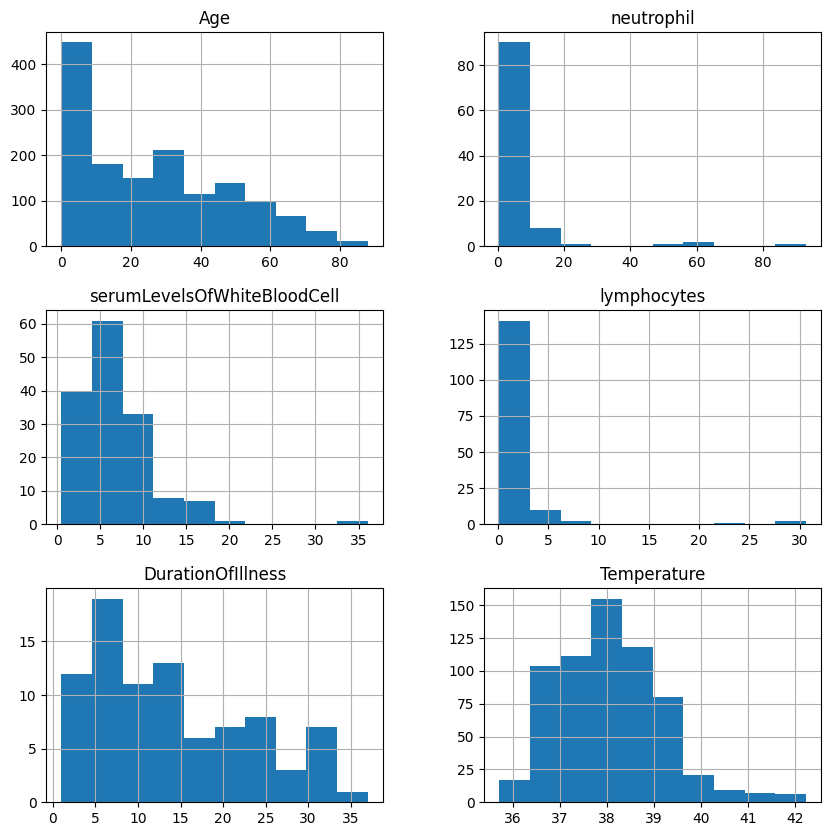

In [137]:
# Box-Cox変換適用前
pd.DataFrame(covid_flu[numerical_columns]).hist(figsize=(10, 10))

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'neutrophil'}>],
       [<Axes: title={'center': 'serumLevelsOfWhiteBloodCell'}>,
        <Axes: title={'center': 'lymphocytes'}>],
       [<Axes: title={'center': 'DurationOfIllness'}>,
        <Axes: title={'center': 'Temperature'}>]], dtype=object)

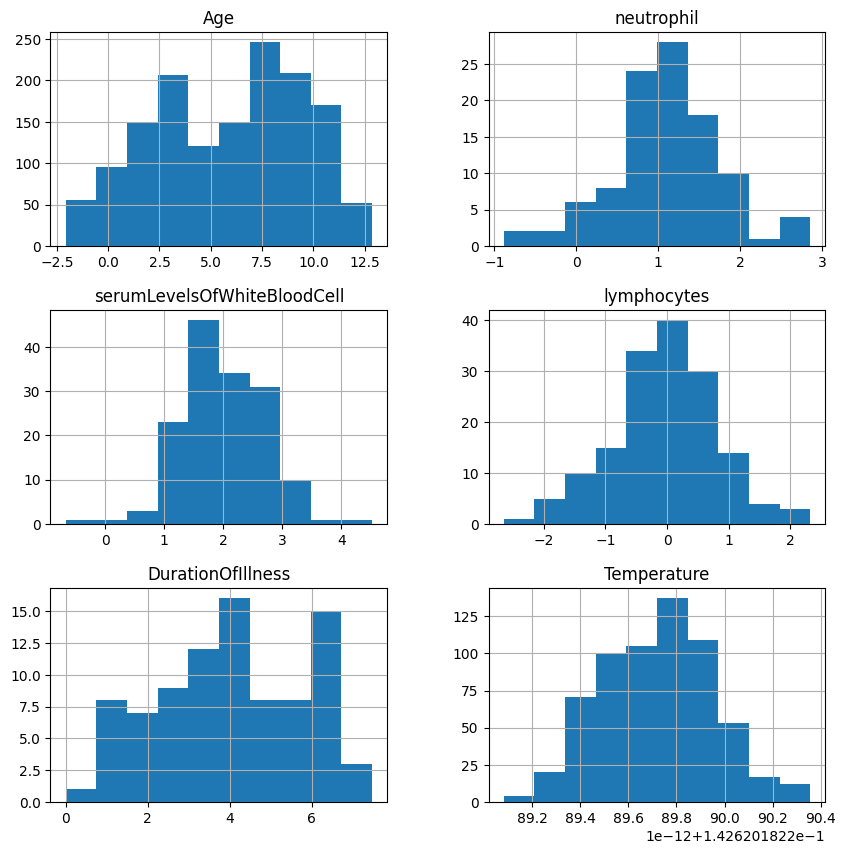

In [138]:
from sklearn.preprocessing import PowerTransformer

boxcox_transformer = PowerTransformer(method='box-cox', standardize=False)

# Box-Cox変換適用後
pd.DataFrame(
    boxcox_transformer.fit_transform(covid_flu[numerical_columns]),
    columns=numerical_columns
).hist(figsize=(10, 10))

In [139]:
boxcox_transformer.lambdas_

array([ 0.41035252, -0.22261794,  0.12473206, -0.24415702,  0.36376996,
       -7.01163036])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


<Axes: title={'center': 'Age (Uniform Binning)'}, xlabel='Age', ylabel='Frequency'>

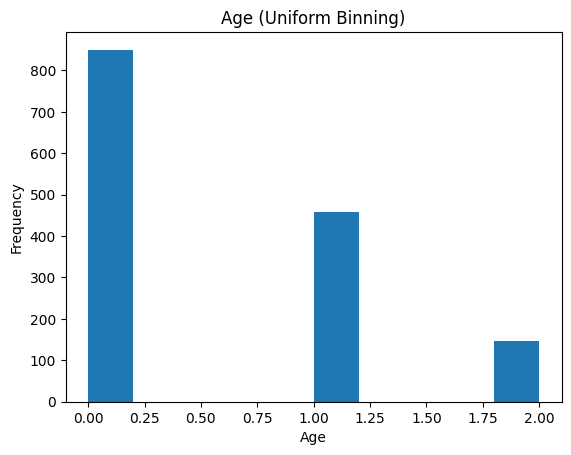

In [140]:
from sklearn.preprocessing import KBinsDiscretizer

# 均一ビニング
# 同じ幅のビン
binner = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
binned_data = binner.fit_transform(covid_flu[['Age']].dropna())

pd.Series(binned_data.reshape(-1,)).plot(
    title='Age (Uniform Binning)', kind='hist', xlabel='Age'
)

<Axes: title={'center': 'Age (Quantile Binning)'}, xlabel='Age', ylabel='Frequency'>

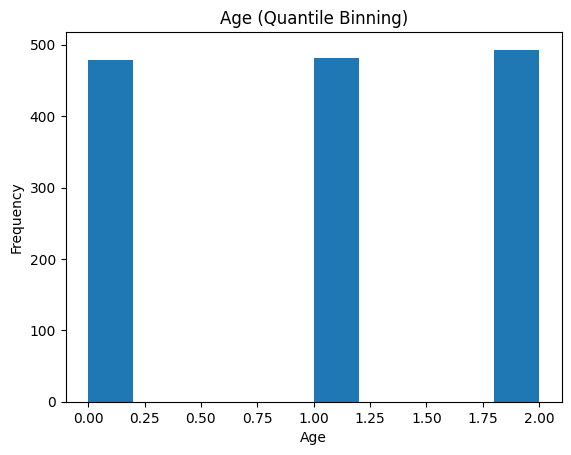

In [141]:
# 分位ビニング
# ビンの高さが等しくなる
binner = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
binned_data = binner.fit_transform(covid_flu[['Age']].dropna())

pd.Series(binned_data.reshape(-1,)).plot(
    title='Age (Quantile Binning)', kind='hist', xlabel='Age'
)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


<Axes: title={'center': 'Age (KMeans Binning)'}, xlabel='Age', ylabel='Frequency'>

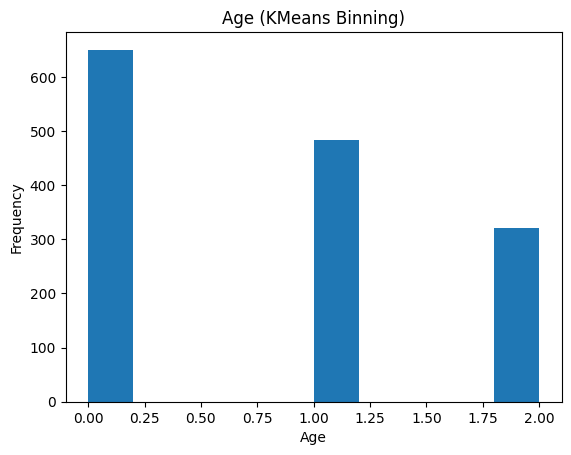

In [142]:
# k-meansビニング
binner = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')
binned_data = binner.fit_transform(covid_flu[['Age']].dropna())

pd.Series(binned_data.reshape(-1,)).plot(
    title='Age (KMeans Binning)', kind='hist', xlabel='Age'
)

In [143]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MultiLabelBinarizer
from functools import reduce

# RiskFactor専用の変換器
class DummifyRiskFactor(BaseEstimator,TransformerMixin):
    def __init__(self):
        self.label_binarizer = None

    def parse_risk_factors(self, comma_sep_factors):
        ''' asthma,heart disease -> ['asthma', 'heart disease'] '''
        try:
            return [s.strip().lower() for s in comma_sep_factors.split(',')]
        except:
            return []

    def fit(self, X, y=None):
        # 各リスク要因に対応したダミー変数を作成
        self.label_binarizer = MultiLabelBinarizer()
        self.label_binarizer.fit(X.apply(self.parse_risk_factors))
        return self

    def transform(self, X, y=None):
        return self.label_binarizer.transform(X.apply(self.parse_risk_factors))

In [144]:
drf = DummifyRiskFactor()

risks = drf.fit_transform(covid_flu['RiskFactors'])

print(risks.shape)

pd.DataFrame(risks, columns=drf.label_binarizer.classes_)

(1482, 41)


,asthma,athero,atopic dermatitis and repetitive respiratory infections,begin tumor (removed),chronic,chronic endrocrine disorder,chronic liver dieseas,chronic liver disorder,chronic neurological disorders,chronic obstructive pulmonary disease,...,lung disease,myxoma of abdominal cavity,obesity,pneumomediastinum and subcutaneous emphysema,pneumonia,pre-eclampsia,prom,renal disease,respiratory disease,rheumatoid arthritis
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1477,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1478,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1479,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1480,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [145]:
# いくつかのインフルエンザの症状を統合し、新しいカテゴリー列を作成する
covid_flu['FluSymptoms'] = covid_flu[['Diarrhea', 'Fever', 'Coughing', 'SoreThroat', 'NauseaVomitting', 'Fatigue']].sum(axis=1) >= 2

print(covid_flu['FluSymptoms'].value_counts())

print(covid_flu['FluSymptoms'].isnull().sum())

FluSymptoms
False    753
True     729
Name: count, dtype: int64
0


In [146]:
#
# 特徴量エンジニアリングパイプラインの構築
#

In [147]:
from sklearn.model_selection import train_test_split

X, y = covid_flu.drop(['Diagnosis'], axis=1), covid_flu['Diagnosis']

x_train, x_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=0, test_size=.2
)

In [148]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline, FeatureUnion

binary_features = [
    'Female', 'GroundGlassOpacity', 'CTscanResults', 'Diarrhea', 'Fever', 'FluSymptoms',
    'Coughing', 'SoreThroat', 'NauseaVomitting', 'Fatigue', 'InitialPCRDiagnosis'
]

# リスク要因を処理するパイプライン
risk_factor_pipeline = Pipeline(
    [
        ('select_risk_factor', FunctionTransformer(lambda df: df['RiskFactors'])),
        ('dummify', DummifyRiskFactor())
    ]
)

# 2値の列を処理するパイプライン
# 欠損値は症状なしと仮定
binary_pipeline = Pipeline(
    [
        ('select_categorical_features', FunctionTransformer(lambda df: df[binary_features])),
        ('fillna', SimpleImputer(strategy='constant', fill_value=False))
    ]
)

# 数値列を処理するパイプライン
# 欠損値は中央値
numerical_pipeline = Pipeline(
    [
        ('select_numerical_features', FunctionTransformer(lambda df: df[numerical_columns])),
        ('impute', SimpleImputer(strategy='median')),
    ]
)

In [149]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.pipeline import Pipeline
import time

def simple_grid_search(x_train, y_train, x_test, y_test, feature_engineering_pipeline):
    '''
    simple helper function to grid search an ExtraTreesClassifier model and
    print out a classification report for the best param set.
    Best here is defined as having the best cross-validated accuracy on the training set
    '''

    params = {  # some simple parameters to grid search
        'max_depth': [10, None],
        'n_estimators': [10, 50, 100, 500],
        'criterion': ['gini', 'entropy']
    }

    # 決定木に基づくアンサンブル学習方法
    base_model = ExtraTreesClassifier()

    model_grid_search = GridSearchCV(base_model, param_grid=params, cv=3)
    start_time = time.time()  # capture the start time
    if feature_engineering_pipeline:  # fit FE pipeline to training data and use it to transform test data
        parsed_x_train = feature_engineering_pipeline.fit_transform(x_train, y_train)
        parsed_x_test = feature_engineering_pipeline.transform(x_test)
    else:
        parsed_x_train = x_train
        parsed_x_test = x_test

    parse_time = time.time()
    print(f"Parsing took {(parse_time - start_time):.2f} seconds")

    model_grid_search.fit(parsed_x_train, y_train)
    fit_time = time.time()
    print(f"Training took {(fit_time - start_time):.2f} seconds")

    best_model = model_grid_search.best_estimator_

    print(classification_report(y_true=y_test, y_pred=best_model.predict(parsed_x_test)))
    end_time = time.time()
    print(f"Overall took {(end_time - start_time):.2f} seconds")

    return best_model

In [150]:
# risk_factor_pipelineのみを使用した場合
# 再現率が低い
simple_grid_search(x_train, y_train, x_test, y_test, risk_factor_pipeline)

Parsing took 0.03 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:900: UserWarning: unknown class(es) ['atopic dermatitis and repetitive respiratory infections', 'begin tumor (removed)', 'chronic liver disorder', 'chronic neurological disorders', 'fatty liver', 'hypertention', 'lung disease', 'pneumomediastinum and subcutaneous emphysema', 'rheumatoid arthritis'] will be ignored
  warnings.warn(


Training took 22.00 seconds
              precision    recall  f1-score   support

     COVID19       0.80      0.10      0.17        82
        H1N1       0.74      0.99      0.85       215

    accuracy                           0.74       297
   macro avg       0.77      0.54      0.51       297
weighted avg       0.76      0.74      0.66       297

Overall took 22.02 seconds


ExtraTreesClassifier(n_estimators=50)

In [151]:
# binary_pipelineのみを使用した場合
simple_grid_search(x_train, y_train, x_test, y_test, binary_pipeline)

Parsing took 0.01 seconds
Training took 12.42 seconds
              precision    recall  f1-score   support

     COVID19       0.78      0.61      0.68        82
        H1N1       0.86      0.93      0.90       215

    accuracy                           0.85       297
   macro avg       0.82      0.77      0.79       297
weighted avg       0.84      0.85      0.84       297

Overall took 12.53 seconds


ExtraTreesClassifier(n_estimators=500)

In [152]:
# numerical_pipelineのみを使用した場合
simple_grid_search(x_train, y_train, x_test, y_test, numerical_pipeline)

Parsing took 0.02 seconds
Training took 12.22 seconds
              precision    recall  f1-score   support

     COVID19       0.77      0.70      0.73        82
        H1N1       0.89      0.92      0.90       215

    accuracy                           0.86       297
   macro avg       0.83      0.81      0.82       297
weighted avg       0.86      0.86      0.86       297

Overall took 12.26 seconds


ExtraTreesClassifier(criterion='entropy')

In [153]:
# すべてのパイプラインをまとめる
simple_fe = FeatureUnion([
    ('risk_factors', risk_factor_pipeline),
    ('binary_pipeline', binary_pipeline),
    ('numerical_pipeline', numerical_pipeline)
])

simple_fe.fit_transform(x_train, y_train).shape

best_model = simple_grid_search(x_train, y_train, x_test, y_test, simple_fe)

Parsing took 0.03 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:900: UserWarning: unknown class(es) ['atopic dermatitis and repetitive respiratory infections', 'begin tumor (removed)', 'chronic liver disorder', 'chronic neurological disorders', 'fatty liver', 'hypertention', 'lung disease', 'pneumomediastinum and subcutaneous emphysema', 'rheumatoid arthritis'] will be ignored
  warnings.warn(


Training took 15.28 seconds
              precision    recall  f1-score   support

     COVID19       0.84      0.83      0.83        82
        H1N1       0.94      0.94      0.94       215

    accuracy                           0.91       297
   macro avg       0.89      0.88      0.89       297
weighted avg       0.91      0.91      0.91       297

Overall took 15.39 seconds


In [154]:
# 平均値補完とスケーリングを適用
numerical_pipeline = Pipeline(
    [
        ('select_numerical_features', FunctionTransformer(lambda df: df[numerical_columns])),
        ('impute', SimpleImputer(strategy='mean')),
        ('scale', StandardScaler())
    ]
)

simple_fe = FeatureUnion([
    ('risk_factors', risk_factor_pipeline),
    ('binary_pipeline', binary_pipeline),
    ('numerical_pipeline', numerical_pipeline)
])

# 平均値で欠損値を補完しようとすると、全体的に性能が悪くなる？
best_model = simple_grid_search(x_train, y_train, x_test, y_test, simple_fe)

Parsing took 0.04 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:900: UserWarning: unknown class(es) ['atopic dermatitis and repetitive respiratory infections', 'begin tumor (removed)', 'chronic liver disorder', 'chronic neurological disorders', 'fatty liver', 'hypertention', 'lung disease', 'pneumomediastinum and subcutaneous emphysema', 'rheumatoid arthritis'] will be ignored
  warnings.warn(


Training took 15.37 seconds
              precision    recall  f1-score   support

     COVID19       0.85      0.84      0.85        82
        H1N1       0.94      0.94      0.94       215

    accuracy                           0.92       297
   macro avg       0.90      0.89      0.89       297
weighted avg       0.92      0.92      0.92       297

Overall took 15.48 seconds


In [155]:
# 定数（999）で補完とスケーリングを適用
numerical_pipeline = Pipeline(
    [
        ('select_numerical_features', FunctionTransformer(lambda df: df[numerical_columns])),
        ('impute', SimpleImputer(strategy='constant', fill_value=999)),
        ('scale', StandardScaler())
    ]
)

simple_fe = FeatureUnion([
    ('risk_factors', risk_factor_pipeline),
    ('binary_pipeline', binary_pipeline),
    ('numerical_pipeline', numerical_pipeline)
])

# COVID-19の適合率 / 再現率が向上
best_model = simple_grid_search(x_train, y_train, x_test, y_test, simple_fe)

Parsing took 0.04 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:900: UserWarning: unknown class(es) ['atopic dermatitis and repetitive respiratory infections', 'begin tumor (removed)', 'chronic liver disorder', 'chronic neurological disorders', 'fatty liver', 'hypertention', 'lung disease', 'pneumomediastinum and subcutaneous emphysema', 'rheumatoid arthritis'] will be ignored
  warnings.warn(


Training took 13.46 seconds
              precision    recall  f1-score   support

     COVID19       0.86      0.88      0.87        82
        H1N1       0.95      0.94      0.95       215

    accuracy                           0.93       297
   macro avg       0.91      0.91      0.91       297
weighted avg       0.93      0.93      0.93       297

Overall took 13.50 seconds


In [156]:
# 最後にビニングを追加
numerical_pipeline = Pipeline(  # bin data after scaling and imputing
    [
        ('select_numerical_features', FunctionTransformer(lambda df: df[numerical_columns])),
        ('impute', SimpleImputer(strategy='constant', fill_value=999)),
        ('scale', StandardScaler()),
        ('ordinal_bins', KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans'))
    ]
)

simple_fe = FeatureUnion([
    ('risk_factors', risk_factor_pipeline),
    ('binary_pipeline', binary_pipeline),
    ('numerical_pipeline', numerical_pipeline)
])

# so far one of our best set of results!
best_model = simple_grid_search(x_train, y_train, x_test, y_test, simple_fe)

Parsing took 0.05 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:900: UserWarning: unknown class(es) ['atopic dermatitis and repetitive respiratory infections', 'begin tumor (removed)', 'chronic liver disorder', 'chronic neurological disorders', 'fatty liver', 'hypertention', 'lung disease', 'pneumomediastinum and subcutaneous emphysema', 'rheumatoid arthritis'] will be ignored
  warnings.warn(


Training took 13.66 seconds
              precision    recall  f1-score   support

     COVID19       0.92      0.87      0.89        82
        H1N1       0.95      0.97      0.96       215

    accuracy                           0.94       297
   macro avg       0.94      0.92      0.93       297
weighted avg       0.94      0.94      0.94       297

Overall took 13.70 seconds


In [157]:
# box-cox変換に変更
numerical_pipeline = Pipeline(  # bin data after scaling and imputing
    [
        ('select_numerical_features', FunctionTransformer(lambda df: df[numerical_columns])),
        ('box-cox', PowerTransformer(method='box-cox', standardize=True)),
        ('turn_into_df', FunctionTransformer(lambda matrix: pd.DataFrame(matrix))),  # turn back into dataframe
        ('impute', SimpleImputer(strategy='constant', fill_value=999)),
        ('ordinal_bins', KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans'))
    ]
)

simple_fe = FeatureUnion([
    ('risk_factors', risk_factor_pipeline),
    ('binary_pipeline', binary_pipeline),
    ('numerical_pipeline', numerical_pipeline)
])

# so far one of our best set of results!
best_model = simple_grid_search(x_train, y_train, x_test, y_test, simple_fe)

Parsing took 0.13 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:322: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, *

Training took 13.24 seconds
              precision    recall  f1-score   support

     COVID19       0.93      0.83      0.88        82
        H1N1       0.94      0.98      0.96       215

    accuracy                           0.94       297
   macro avg       0.93      0.90      0.92       297
weighted avg       0.94      0.94      0.93       297

Overall took 13.25 seconds


In [158]:
#
# 特徴量選択
#

In [158]:
# 相互情報量
# 2つの変数の関係性を示す尺度で、片方の変数がわかったときの、もう一方の変数の不確実性の減少量

In [159]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

risk_factor_pipeline = Pipeline(
    [
        ('select_risk_factor', FunctionTransformer(lambda df: df['RiskFactors'])),
        ('dummify', DummifyRiskFactor()),
        ('mutual_info', SelectKBest(mutual_info_classif, k=20)),  # 相互情報量に基づく特徴量選択
    ]
)


simple_fe = FeatureUnion([
    ('risk_factors', risk_factor_pipeline),
    ('binary_pipeline', binary_pipeline),
    ('numerical_pipeline', numerical_pipeline)
])

best_model = simple_grid_search(x_train, y_train, x_test, y_test, simple_fe)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:322: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, *

Parsing took 1.13 seconds
Training took 19.20 seconds
              precision    recall  f1-score   support

     COVID19       0.92      0.84      0.88        82
        H1N1       0.94      0.97      0.96       215

    accuracy                           0.94       297
   macro avg       0.93      0.91      0.92       297
weighted avg       0.94      0.94      0.94       297

Overall took 19.22 seconds


In [ ]:
# カイ二乗検定
# カテゴリーデータのみ作用する統計検定
# 2つの変数の独立性の検定に利用

In [160]:
from sklearn.feature_selection import chi2

risk_factor_pipeline = Pipeline(
    [
        ('select_risk_factor', FunctionTransformer(lambda df: df['RiskFactors'])),
        ('dummify', DummifyRiskFactor()),
        ('chi2', SelectKBest(chi2, k=10))  # カイ二乗検定
    ]
)


simple_fe = FeatureUnion([
    ('risk_factors', risk_factor_pipeline),
    ('binary_pipeline', binary_pipeline),
    ('numerical_pipeline', numerical_pipeline)
])

best_model = simple_grid_search(x_train, y_train, x_test, y_test, simple_fe)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:322: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, *

Parsing took 0.14 seconds
Training took 14.30 seconds
              precision    recall  f1-score   support

     COVID19       0.93      0.85      0.89        82
        H1N1       0.95      0.98      0.96       215

    accuracy                           0.94       297
   macro avg       0.94      0.92      0.93       297
weighted avg       0.94      0.94      0.94       297

Overall took 14.33 seconds


In [161]:
# カイ二乗検定（StandardScalerで標準化）
numerical_pipeline2 = Pipeline(  # bin data after scaling and imputing
    [
        ('select_numerical_features', FunctionTransformer(lambda df: df[numerical_columns])),
        ('impute', SimpleImputer(strategy='constant', fill_value=999)),
        ('scale', StandardScaler()),
        ('ordinal_bins', KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans'))
    ]
)

risk_factor_pipeline = Pipeline(
    [
        ('select_risk_factor', FunctionTransformer(lambda df: df['RiskFactors'])),
        ('dummify', DummifyRiskFactor()),
        ('chi2', SelectKBest(chi2, k=10))  # カイ二乗検定
    ]
)


simple_fe = FeatureUnion([
    ('risk_factors', risk_factor_pipeline),
    ('binary_pipeline', binary_pipeline),
    ('numerical_pipeline', numerical_pipeline2)
])

best_model = simple_grid_search(x_train, y_train, x_test, y_test, simple_fe)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:900: UserWarning: unknown class(es) ['atopic dermatitis and repetitive respiratory infections', 'begin tumor (removed)', 'chronic liver disorder', 'chronic neurological disorders', 'fatty liver', 'hypertention', 'lung disease', 'pneumomediastinum and subcutaneous emphysema', 'rheumatoid arthritis'] will be ignored
  warnings.warn(


Parsing took 0.05 seconds
Training took 14.10 seconds
              precision    recall  f1-score   support

     COVID19       0.91      0.85      0.88        82
        H1N1       0.95      0.97      0.96       215

    accuracy                           0.94       297
   macro avg       0.93      0.91      0.92       297
weighted avg       0.94      0.94      0.94       297

Overall took 14.18 seconds


In [162]:
# yeo-johnson変換に変更
numerical_pipeline3 = Pipeline(  # bin data after scaling and imputing
    [
        ('select_numerical_features', FunctionTransformer(lambda df: df[numerical_columns])),
        ('box-cox', PowerTransformer(method='yeo-johnson', standardize=True)),
        ('turn_into_df', FunctionTransformer(lambda matrix: pd.DataFrame(matrix))),  # turn back into dataframe
        ('impute', SimpleImputer(strategy='constant', fill_value=999)),
        ('ordinal_bins', KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans'))
    ]
)

risk_factor_pipeline = Pipeline(
    [
        ('select_risk_factor', FunctionTransformer(lambda df: df['RiskFactors'])),
        ('dummify', DummifyRiskFactor()),
        ('chi2', SelectKBest(chi2, k=10))  # カイ二乗検定
    ]
)


simple_fe = FeatureUnion([
    ('risk_factors', risk_factor_pipeline),
    ('binary_pipeline', binary_pipeline),
    ('numerical_pipeline', numerical_pipeline3)
])

best_model = simple_grid_search(x_train, y_train, x_test, y_test, simple_fe)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:322: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 5 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:900: UserWarning: unknown class(es) ['atopic dermatitis and repetitive respiratory infections', 'begin tumor (removed)', 'chronic liver disorder', 'chronic 

Parsing took 0.23 seconds
Training took 17.60 seconds
              precision    recall  f1-score   support

     COVID19       1.00      0.79      0.88        82
        H1N1       0.93      1.00      0.96       215

    accuracy                           0.94       297
   macro avg       0.96      0.90      0.92       297
weighted avg       0.95      0.94      0.94       297

Overall took 17.63 seconds


In [ ]:
# 機械学習の活用
# 特徴量の相関を考慮する

In [163]:
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier

risk_factor_pipeline = Pipeline(
    [
        ('select_risk_factor', FunctionTransformer(lambda df: df['RiskFactors'])),
        ('dummify', DummifyRiskFactor()),
        # 特徴量選択のために決定機分類器を使用する
        ('tree_selector', SelectFromModel(max_features=20, estimator=DecisionTreeClassifier()))
    ]
)


simple_fe = FeatureUnion([
    ('risk_factors', risk_factor_pipeline),
    ('binary_pipeline', binary_pipeline),
    ('numerical_pipeline', numerical_pipeline)
])

best_model = simple_grid_search(x_train, y_train, x_test, y_test, simple_fe)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:322: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, *

Parsing took 0.09 seconds
Training took 25.87 seconds
              precision    recall  f1-score   support

     COVID19       0.93      0.84      0.88        82
        H1N1       0.94      0.98      0.96       215

    accuracy                           0.94       297
   macro avg       0.94      0.91      0.92       297
weighted avg       0.94      0.94      0.94       297

Overall took 25.90 seconds


In [164]:
# 特徴量エンジニアリングのパイプラインの一覧
simple_fe.transformer_list

[('risk_factors',
  Pipeline(steps=[('select_risk_factor',
                   FunctionTransformer(func=<function <lambda> at 0x7de389e924d0>)),
                  ('dummify', DummifyRiskFactor()),
                  ('tree_selector',
                   SelectFromModel(estimator=DecisionTreeClassifier(),
                                   max_features=20))])),
 ('binary_pipeline',
  Pipeline(steps=[('select_categorical_features',
                   FunctionTransformer(func=<function <lambda> at 0x7de389e93a30>)),
                  ('fillna',
                   SimpleImputer(fill_value=False, strategy='constant'))])),
 ('numerical_pipeline',
  Pipeline(steps=[('select_numerical_features',
                   FunctionTransformer(func=<function <lambda> at 0x7de389450ca0>)),
                  ('box-cox', PowerTransformer(method='box-cox')),
                  ('turn_into_df',
                   FunctionTransformer(func=<function <lambda> at 0x7de389450d30>)),
                  ('impute', Simpl